# MackChainladder Example

In [1]:
import pandas as pd
import chainladder as cl

This example demonstrates how you can can use the Mack Chainladder method.

In [2]:
# Load the data
data = cl.load_sample('raa')

# Compute Mack Chainladder ultimates and Std Err using 'volume' average
mack = cl.MackChainladder()
dev = cl.Development(average='volume')
mack.fit(dev.fit_transform(data))

plot_data = mack.summary_.to_frame(origin_as_datetime=False)
plot_data

,Latest,IBNR,Ultimate,Mack Std Err
1981,18834.0,NaN,18834.000000,NaN
1982,16704.0,153.953917,16857.953917,142.931716
1983,23466.0,617.370924,24083.370924,592.148304
1984,27067.0,1636.142163,28703.142163,712.853921
1985,26180.0,2746.736343,28926.736343,1452.090330
1986,15852.0,3649.103184,19501.103184,1994.987807
1987,12314.0,5435.302590,17749.302590,2203.838469
1988,13112.0,10907.192510,24019.192510,5354.340512
1989,5395.0,10649.984101,16044.984101,6331.543044
1990,2063.0,16339.442529,18402.442529,24565.775709


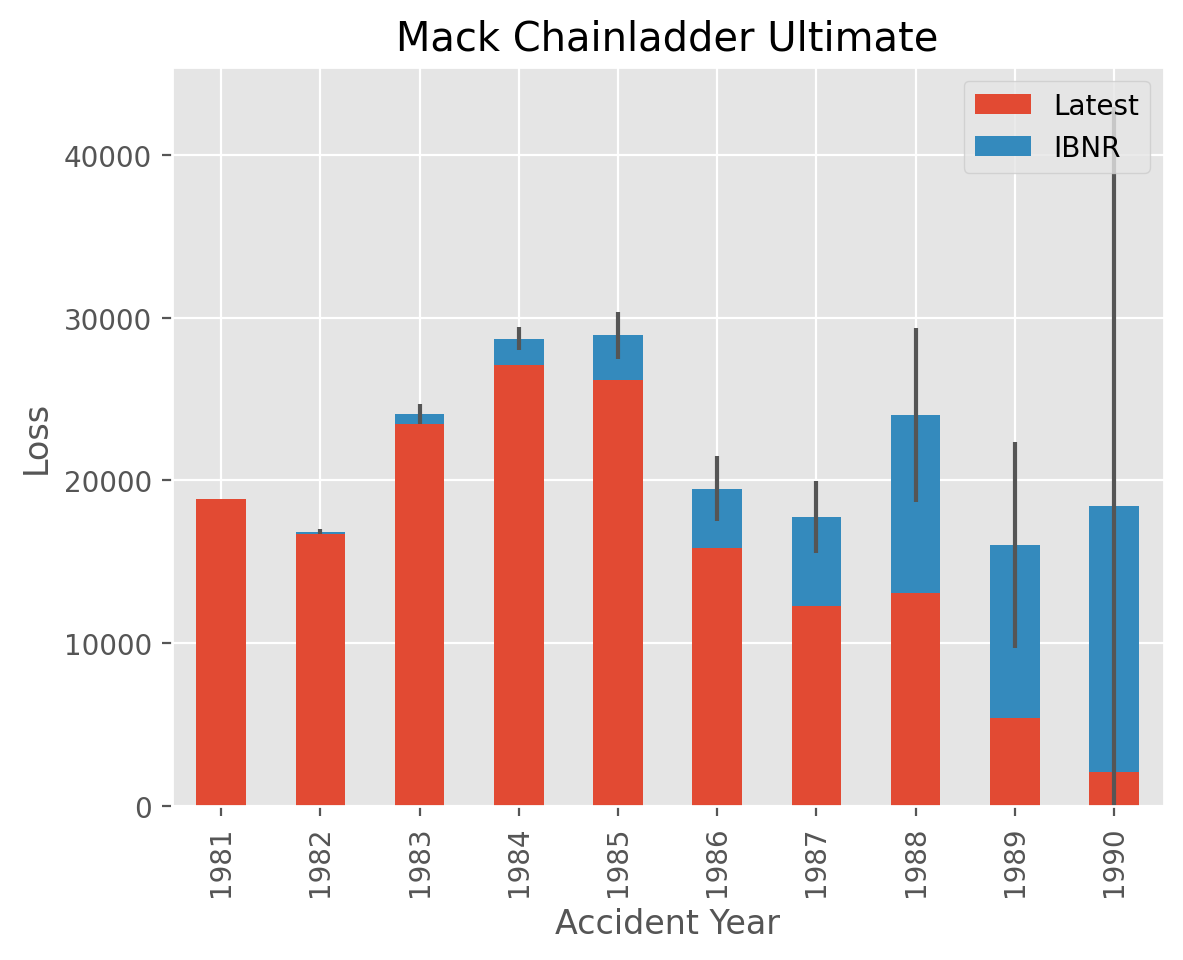

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

ax = plot_data[['Latest', 'IBNR']].plot(
    kind='bar', stacked=True, ylim=(0, None), grid=True,
    yerr=pd.DataFrame({'latest': plot_data['Mack Std Err']*0,
                       'IBNR': plot_data['Mack Std Err']}),
    title='Mack Chainladder Ultimate',
    xlabel='Accident Year', ylabel='Loss');